In [1]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv(r"C:\Users\jdgoe\OneDrive\Nutrition__Physical_Activity__and_Obesity_-_Behavioral_Risk_Factor_Surveillance_System.csv")

In [3]:
df

,YearStart,YearEnd,LocationAbbr,LocationDesc,Datasource,Class,Topic,Question,Data_Value_Unit,Data_Value_Type,...,GeoLocation,ClassID,TopicID,QuestionID,DataValueTypeID,LocationID,StratificationCategory1,Stratification1,StratificationCategoryId1,StratificationID1
0,2011,2011,AL,Alabama,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,"(32.84057112200048, -86.63186076199969)",OWS,OWS1,Q036,VALUE,1,Total,Total,OVR,OVERALL
1,2011,2011,AL,Alabama,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,"(32.84057112200048, -86.63186076199969)",OWS,OWS1,Q036,VALUE,1,Gender,Male,GEN,MALE
2,2011,2011,AL,Alabama,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,"(32.84057112200048, -86.63186076199969)",OWS,OWS1,Q036,VALUE,1,Gender,Female,GEN,FEMALE
3,2011,2011,AL,Alabama,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,"(32.84057112200048, -86.63186076199969)",OWS,OWS1,Q036,VALUE,1,Education,Less than high school,EDU,EDUHS
4,2011,2011,AL,Alabama,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,"(32.84057112200048, -86.63186076199969)",OWS,OWS1,Q036,VALUE,1,Education,High school graduate,EDU,EDUHSGRAD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53387,2016,2016,VI,Virgin Islands,Behavioral Risk Factor Surveillance System,Physical Activity,Physical Activity - Behavior,Percent of adults who engage in no leisure-tim...,NaN,Value,...,"(18.335765, -64.896335)",PA,PA1,Q047,VALUE,78,Race/Ethnicity,Asian,RACE,RACEASN
53388,2016,2016,VI,Virgin Islands,Behavioral Risk Factor Surveillance System,Physical Activity,Physical Activity - Behavior,Percent of adults who engage in no leisure-tim...,NaN,Value,...,"(18.335765, -64.896335)",PA,PA1,Q047,VALUE,78,Race/Ethnicity,Hawaiian/Pacific Islander,RACE,RACEHPI
53389,2016,2016,VI,Virgin Islands,Behavioral Risk Factor Surveillance System,Physical Activity,Physical Activity - Behavior,Percent of adults who engage in no leisure-tim...,NaN,Value,...,"(18.335765, -64.896335)",PA,PA1,Q047,VALUE,78,Race/Ethnicity,American Indian/Alaska Native,RACE,RACENAA
53390,2016,2016,VI,Virgin Islands,Behavioral Risk Factor Surveillance System,Physical Activity,Physical Activity - Behavior,Percent of adults who engage in no leisure-tim...,NaN,Value,...,"(18.335765, -64.896335)",PA,PA1,Q047,VALUE,78,Race/Ethnicity,2 or more races,RACE,RACE2PLUS


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53392 entries, 0 to 53391
Data columns (total 33 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   YearStart                   53392 non-null  int64  
 1   YearEnd                     53392 non-null  int64  
 2   LocationAbbr                53392 non-null  object 
 3   LocationDesc                53392 non-null  object 
 4   Datasource                  53392 non-null  object 
 5   Class                       53392 non-null  object 
 6   Topic                       53392 non-null  object 
 7   Question                    53392 non-null  object 
 8   Data_Value_Unit             0 non-null      float64
 9   Data_Value_Type             53392 non-null  object 
 10  Data_Value                  48346 non-null  float64
 11  Data_Value_Alt              48346 non-null  float64
 12  Data_Value_Footnote_Symbol  5046 non-null   object 
 13  Data_Value_Footnote         504

Let's look at the different questions being asked.

In [5]:
df['Question'].unique()

array(['Percent of adults aged 18 years and older who have obesity',
       'Percent of adults aged 18 years and older who have an overweight classification',
       'Percent of adults who report consuming fruit less than one time daily',
       'Percent of adults who report consuming vegetables less than one time daily',
       'Percent of adults who engage in muscle-strengthening activities on 2 or more days a week',
       'Percent of adults who achieve at least 150 minutes a week of moderate-intensity aerobic physical activity or 75 minutes a week of vigorous-intensity aerobic activity (or an equivalent combination)',
       'Percent of adults who achieve at least 150 minutes a week of moderate-intensity aerobic physical activity or 75 minutes a week of vigorous-intensity aerobic physical activity and engage in muscle-strengthening activities on 2 or more days a week',
       'Percent of adults who achieve at least 300 minutes a week of moderate-intensity aerobic physical activity 

In [8]:
unique_pairs = set(tuple(pair) for pair in df[['Question', 'QuestionID', 'ClassID']].values)
print(unique_pairs)


{('Percent of adults aged 18 years and older who have obesity', 'Q036', 'OWS'), ('Percent of adults who engage in no leisure-time physical activity', 'Q047', 'PA'), ('Percent of adults aged 18 years and older who have an overweight classification', 'Q037', 'OWS'), ('Percent of adults who achieve at least 150 minutes a week of moderate-intensity aerobic physical activity or 75 minutes a week of vigorous-intensity aerobic activity (or an equivalent combination)', 'Q043', 'PA'), ('Percent of adults who achieve at least 150 minutes a week of moderate-intensity aerobic physical activity or 75 minutes a week of vigorous-intensity aerobic physical activity and engage in muscle-strengthening activities on 2 or more days a week', 'Q044', 'PA'), ('Percent of adults who report consuming fruit less than one time daily', 'Q018', 'FV'), ('Percent of adults who report consuming vegetables less than one time daily', 'Q019', 'FV'), ('Percent of adults who achieve at least 300 minutes a week of moderate

Let's break down the 'Percent of adults aged 18 years and older who have obesity' by the different stratification factors.

In [26]:
df['StratificationCategory1'].unique()

array(['Total', 'Gender', 'Education', 'Age (years)', 'Income',
       'Race/Ethnicity'], dtype=object)

In [27]:
df['Income'].unique()

array([nan, 'Less than $15,000', '$15,000 - $24,999', '$25,000 - $34,999',
       '$35,000 - $49,999', '$50,000 - $74,999', '$75,000 or greater',
       'Data not reported'], dtype=object)

In [7]:
Ob = df[df['Question'] == 'Percent of adults aged 18 years and older who have obesity']
Ob.dropna(subset='Data_Value', inplace=True) # drop records where there is no answer value
OB_stratified = Ob.groupby('Stratification1')['Data_Value'].mean()
OB_stratified = OB_stratified.reset_index()
OB_stratified

,Stratification1,Data_Value
0,"$15,000 - $24,999",32.224688
1,"$25,000 - $34,999",30.551875
2,"$35,000 - $49,999",30.351562
3,"$50,000 - $74,999",29.680937
4,"$75,000 or greater",25.251562
5,18 - 24,16.399062
6,2 or more races,30.813448
7,25 - 34,27.161250
8,35 - 44,32.442188
9,45 - 54,33.847188


Text(0.5, 1.0, 'Obesity % by Stratified Level')

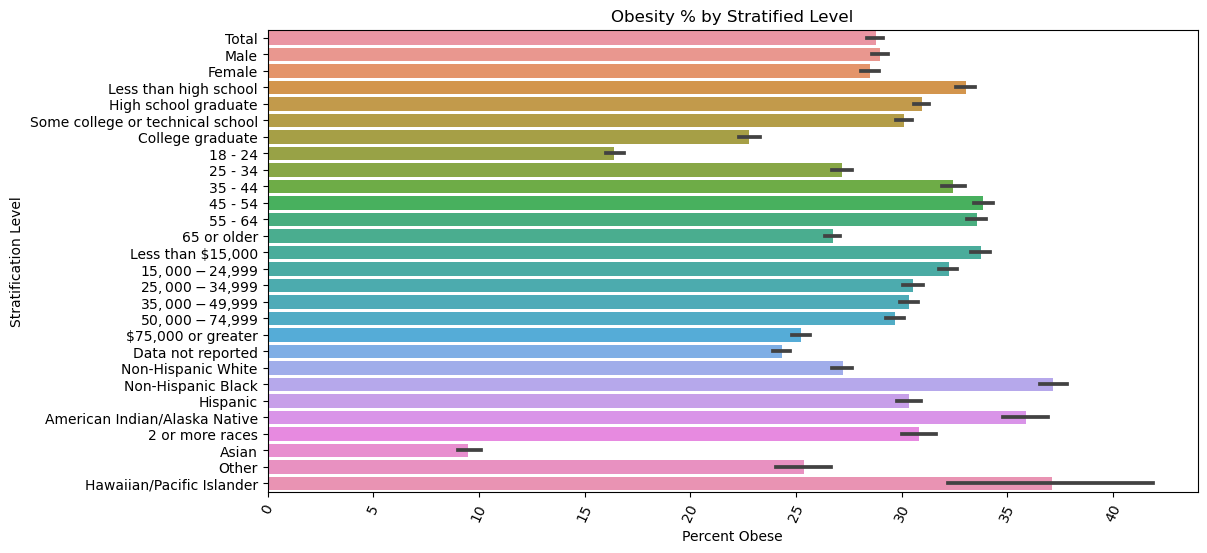

In [8]:
plt.figure(figsize=(12,6))
sns.barplot(Ob, y='Stratification1', x='Data_Value')
plt.xticks(rotation=65)
plt.ylabel('Stratification Level')
plt.xlabel('Percent Obese')
plt.title('Obesity % by Stratified Level')

In [9]:
# Now to look at obesity rate by Race/Ethnicity 
OB_RE = Ob[Ob['StratificationCategory1'] == 'Race/Ethnicity']
OB_RE = OB_RE.groupby('Stratification1')['Data_Value'].mean()
OB_RE = OB_RE.reset_index()
OB_RE

,Stratification1,Data_Value
0,2 or more races,30.813448
1,American Indian/Alaska Native,35.862441
2,Asian,9.503333
3,Hawaiian/Pacific Islander,37.090909
4,Hispanic,30.345192
5,Non-Hispanic Black,37.165882
6,Non-Hispanic White,27.209177
7,Other,25.394495


Text(0.5, 1.0, 'Obesity % by Ethnicity')

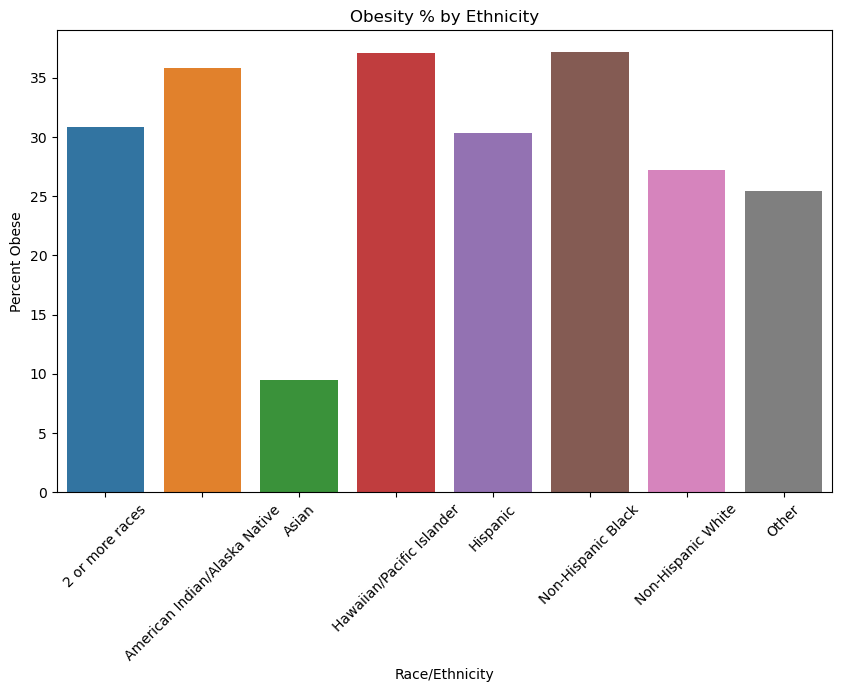

In [10]:
plt.figure(figsize=(10,6))
sns.barplot(OB_RE, x='Stratification1', y='Data_Value')
plt.xticks(rotation=45)
plt.xlabel('Race/Ethnicity')
plt.ylabel('Percent Obese')
plt.title('Obesity % by Ethnicity')

Here we see fairly standard obesity percentages across Ethnicities, except the one that stands out is the Asian race with 9% obesity rate which is much lower than the other races. Now let's look at physical activity marker by examining answer values of the question 'Percent of adults who achieve at least 150 minutes a week of moderate-intensity aerobic physical activity or 75 minutes a week of vigorous-intensity aerobic activity (or an equivalent combination)'

In [11]:
HPA = df[df['Question'] == 'Percent of adults who achieve at least 300 minutes a week of moderate-intensity aerobic physical activity or 150 minutes a week of vigorous-intensity aerobic activity (or an equivalent combination)']
HPA.dropna(subset='Data_Value', inplace=True)
HPA_stratified = HPA.groupby('Stratification1')['Data_Value'].mean()
HPA_stratified = HPA_stratified.reset_index()
HPA_stratified

,Stratification1,Data_Value
0,"$15,000 - $24,999",28.545570
1,"$25,000 - $34,999",30.224684
2,"$35,000 - $49,999",31.701899
3,"$50,000 - $74,999",32.386709
4,"$75,000 or greater",35.712658
5,18 - 24,32.851266
6,2 or more races,34.370213
7,25 - 34,27.950633
8,35 - 44,28.137342
9,45 - 54,30.312025


Text(0.5, 1.0, 'Heavy Physical Activity % by Stratified Level')

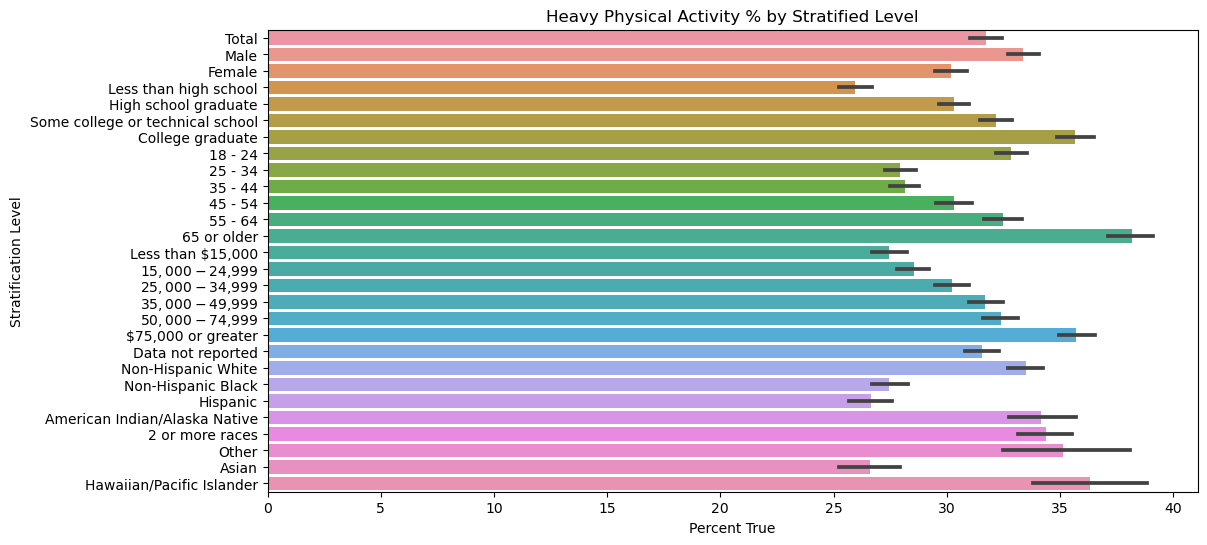

In [12]:
plt.figure(figsize=(12,6))
sns.barplot(HPA, y='Stratification1', x='Data_Value')
# plt.xticks(rotation=65)
plt.ylabel('Stratification Level')
plt.xlabel('Percent True')
plt.title('Heavy Physical Activity % by Stratified Level')

In [13]:
PA = df[df['Question'] == 'Percent of adults who achieve at least 150 minutes a week of moderate-intensity aerobic physical activity or 75 minutes a week of vigorous-intensity aerobic activity (or an equivalent combination)']
PA.dropna(subset='Data_Value', inplace=True)
PA_stratified = PA.groupby('Stratification1')['Data_Value'].mean()
PA_stratified = PA_stratified.reset_index()
PA_stratified

,Stratification1,Data_Value
0,"$15,000 - $24,999",44.821519
1,"$25,000 - $34,999",47.915190
2,"$35,000 - $49,999",51.057595
3,"$50,000 - $74,999",53.527848
4,"$75,000 or greater",59.420253
5,18 - 24,54.863924
6,2 or more races,52.709929
7,25 - 34,50.351899
8,35 - 44,49.386709
9,45 - 54,50.006329


Text(0.5, 1.0, 'Heavy Physical Activity % by Stratified Level')

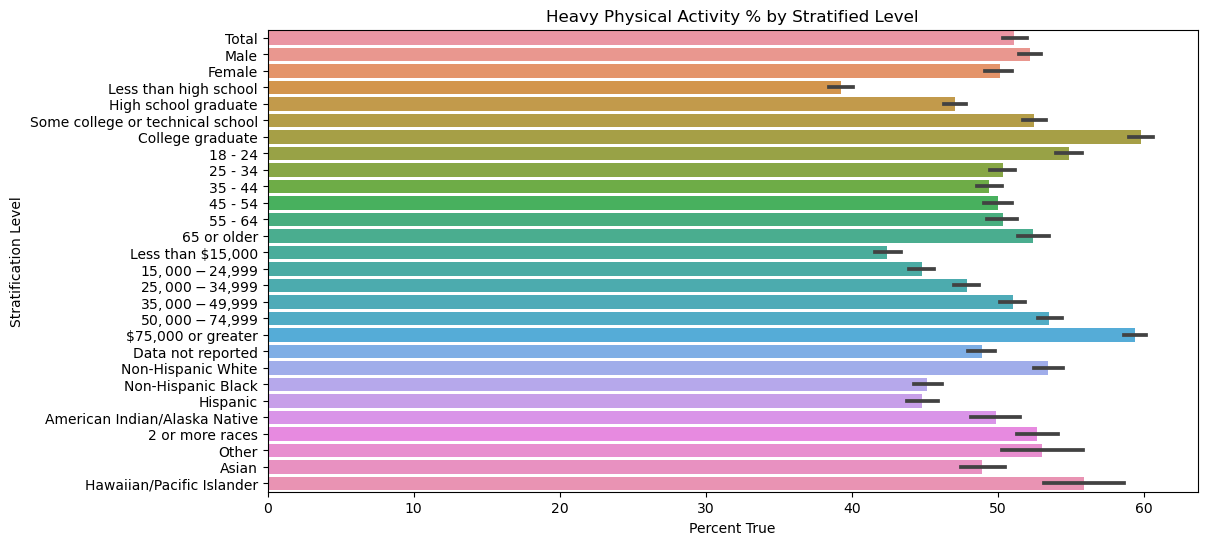

In [14]:
plt.figure(figsize=(12,6))
sns.barplot(PA, y='Stratification1', x='Data_Value')
# plt.xticks(rotation=65)
plt.ylabel('Stratification Level')
plt.xlabel('Percent True')
plt.title('Heavy Physical Activity % by Stratified Level')

In [15]:
# Now to look at obesity rate by Race/Ethnicity 
PA_RE = PA[PA['StratificationCategory1'] == 'Race/Ethnicity']
PA_RE = PA_RE.groupby('Stratification1')['Data_Value'].mean()
PA_RE = PA_RE.reset_index()
PA_RE

,Stratification1,Data_Value
0,2 or more races,52.709929
1,American Indian/Alaska Native,49.858000
2,Asian,48.943434
3,Hawaiian/Pacific Islander,55.888889
4,Hispanic,44.788158
5,Non-Hispanic Black,45.180488
6,Non-Hispanic White,53.441401
7,Other,53.024528


Text(0.5, 1.0, '% of Adults with Moderate Amounts of Excercise Activity')

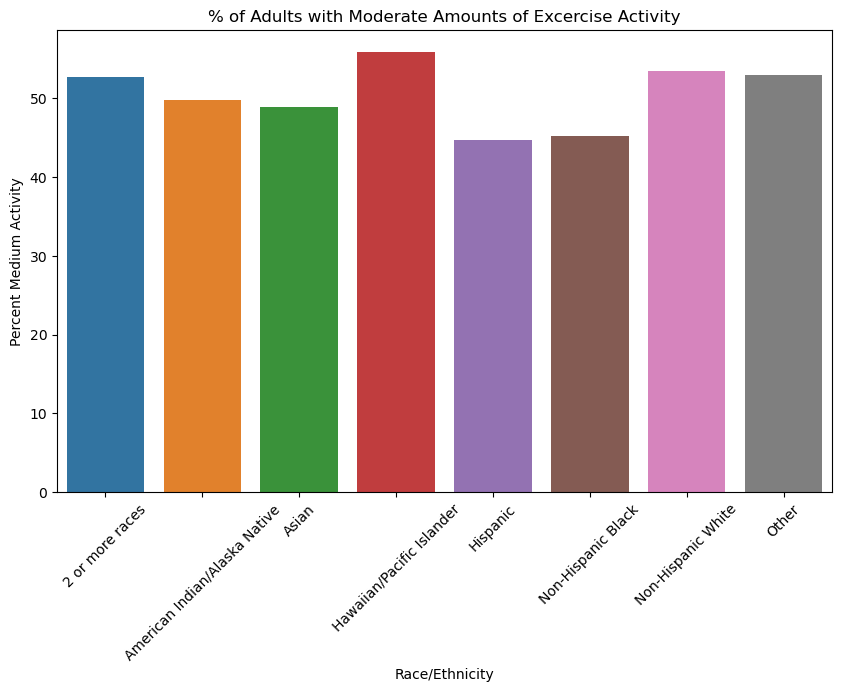

In [16]:
plt.figure(figsize=(10,6))
sns.barplot(PA_RE, x='Stratification1', y='Data_Value')
plt.xticks(rotation=45)
plt.xlabel('Race/Ethnicity')
plt.ylabel('Percent Medium Activity')
plt.title('% of Adults with Moderate Amounts of Excercise Activity')

Here we see a uniform distribution of Moderate physical activity levels between ethnicities.

Now to look at obesity levels by education.

In [17]:
# Now to look at obesity rate by education Level
OB_EDU = Ob[Ob['StratificationCategory1'] == 'Education']
OB_EDU = OB_EDU.groupby('Stratification1')['Data_Value'].mean()
OB_EDU = OB_EDU.reset_index()
OB_EDU

,Stratification1,Data_Value
0,College graduate,22.791250
1,High school graduate,30.939688
2,Less than high school,33.026250
3,Some college or technical school,30.110312


Text(0.5, 1.0, 'Obesity % by Ethnicity')

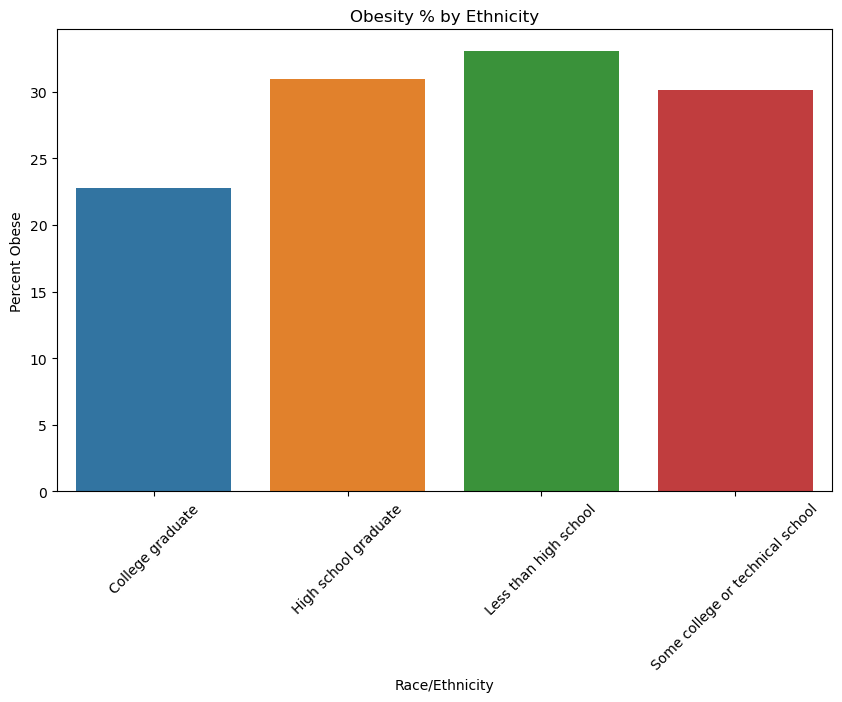

In [18]:
plt.figure(figsize=(10,6))
sns.barplot(OB_EDU, x='Stratification1', y='Data_Value')
plt.xticks(rotation=45)
plt.xlabel('Race/Ethnicity')
plt.ylabel('Percent Obese')
plt.title('Obesity % by Ethnicity')

We see almost no difference here.

In [41]:
# Now to look at obesity rate by education Level
PA_inc = PA[PA['StratificationCategory1'] == 'Income']
# OB_inc = OB_inc.groupby('Stratification1')['Data_Value']
# OB_inc = OB_inc.reset_index()
PA_inc

,YearStart,YearEnd,LocationAbbr,LocationDesc,Datasource,Class,Topic,Question,Data_Value_Unit,Data_Value_Type,...,GeoLocation,ClassID,TopicID,QuestionID,DataValueTypeID,LocationID,StratificationCategory1,Stratification1,StratificationCategoryId1,StratificationID1
128,2011,2011,AL,Alabama,Behavioral Risk Factor Surveillance System,Physical Activity,Physical Activity - Behavior,Percent of adults who achieve at least 150 min...,NaN,Value,...,"(32.84057112200048, -86.63186076199969)",PA,PA1,Q043,VALUE,1,Income,"Less than $15,000",INC,INCLESS15
129,2011,2011,AL,Alabama,Behavioral Risk Factor Surveillance System,Physical Activity,Physical Activity - Behavior,Percent of adults who achieve at least 150 min...,NaN,Value,...,"(32.84057112200048, -86.63186076199969)",PA,PA1,Q043,VALUE,1,Income,"$15,000 - $24,999",INC,INC1525
130,2011,2011,AL,Alabama,Behavioral Risk Factor Surveillance System,Physical Activity,Physical Activity - Behavior,Percent of adults who achieve at least 150 min...,NaN,Value,...,"(32.84057112200048, -86.63186076199969)",PA,PA1,Q043,VALUE,1,Income,"$25,000 - $34,999",INC,INC2535
131,2011,2011,AL,Alabama,Behavioral Risk Factor Surveillance System,Physical Activity,Physical Activity - Behavior,Percent of adults who achieve at least 150 min...,NaN,Value,...,"(32.84057112200048, -86.63186076199969)",PA,PA1,Q043,VALUE,1,Income,"$35,000 - $49,999",INC,INC3550
132,2011,2011,AL,Alabama,Behavioral Risk Factor Surveillance System,Physical Activity,Physical Activity - Behavior,Percent of adults who achieve at least 150 min...,NaN,Value,...,"(32.84057112200048, -86.63186076199969)",PA,PA1,Q043,VALUE,1,Income,"$50,000 - $74,999",INC,INC5075
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45644,2015,2015,PR,Puerto Rico,Behavioral Risk Factor Surveillance System,Physical Activity,Physical Activity - Behavior,Percent of adults who achieve at least 150 min...,NaN,Value,...,"(18.220833, -66.590149)",PA,PA1,Q043,VALUE,72,Income,"$15,000 - $24,999",INC,INC1525
45645,2015,2015,PR,Puerto Rico,Behavioral Risk Factor Surveillance System,Physical Activity,Physical Activity - Behavior,Percent of adults who achieve at least 150 min...,NaN,Value,...,"(18.220833, -66.590149)",PA,PA1,Q043,VALUE,72,Income,"$25,000 - $34,999",INC,INC2535
45646,2015,2015,PR,Puerto Rico,Behavioral Risk Factor Surveillance System,Physical Activity,Physical Activity - Behavior,Percent of adults who achieve at least 150 min...,NaN,Value,...,"(18.220833, -66.590149)",PA,PA1,Q043,VALUE,72,Income,"$35,000 - $49,999",INC,INC3550
45647,2015,2015,PR,Puerto Rico,Behavioral Risk Factor Surveillance System,Physical Activity,Physical Activity - Behavior,Percent of adults who achieve at least 150 min...,NaN,Value,...,"(18.220833, -66.590149)",PA,PA1,Q043,VALUE,72,Income,"$50,000 - $74,999",INC,INC5075


Text(0.5, 1.0, 'High Physical Activity % by Income')

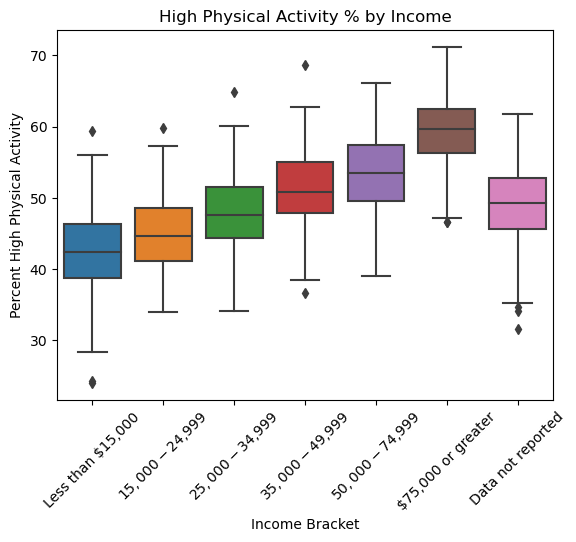

In [45]:
sns.boxplot(x='Stratification1', y='Data_Value', data=PA_inc)
plt.xticks(rotation=45)
plt.xlabel('Income Bracket')
plt.ylabel('Percent High Physical Activity')
plt.title('High Physical Activity % by Income')

Text(0.5, 1.0, 'High Physical Activity % by Income')

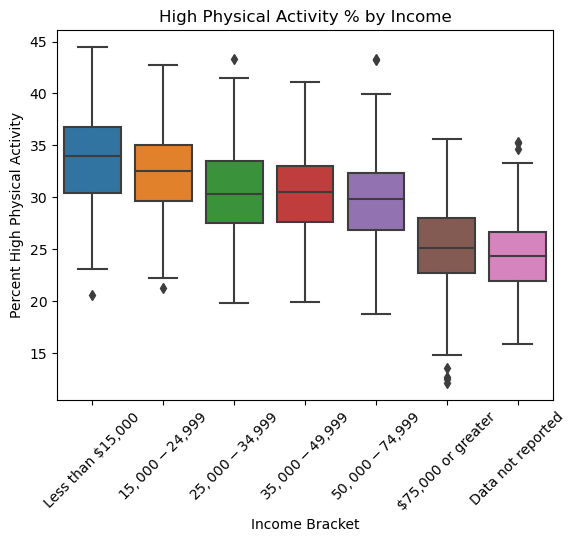

In [44]:
sns.boxplot(x='Stratification1', y='Data_Value', data=OB_inc)
plt.xticks(rotation=45)
plt.xlabel('Income Bracket')
plt.ylabel('Percent High Physical Activity')
plt.title('High Physical Activity % by Income')


## Linear Regression Model

Now, for a linear regression model between the percentage of adults with moderate activity levels and the percent of adults with obesity in each state.

In [19]:
df2 = df[df['StratificationCategoryId1'] == 'OVR']
df_2015 = df2[df2['YearStart'] == 2015]

# Create new columns based on conditions
df_2015['Obese percent'] = np.where(df_2015['Question'] == 'Percent of adults aged 18 years and older who have obesity', df_2015['Data_Value'], np.nan)
df_2015['Moderate activity percentage'] = np.where(df_2015['Question'] == 'Percent of adults who achieve at least 150 minutes a week of moderate-intensity aerobic physical activity or 75 minutes a week of vigorous-intensity aerobic activity (or an equivalent combination)', df_2015['Data_Value'], np.nan)

In [20]:
# Group by 'state' and calculate the mean for each state
grouped_df = df_2015.groupby('LocationDesc').agg({'Obese percent': 'mean', 'Moderate activity percentage': 'mean'}).dropna()

In [21]:
X = grouped_df[['Moderate activity percentage']] 
y = grouped_df['Obese percent']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
regressor = LinearRegression()

regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

print('Coefficients:', regressor.coef_)
print('Intercept:', regressor.intercept_)
print('R^2 score:', regressor.score(X_test, y_test))

Coefficients: [-0.43654359]
Intercept: 51.78869135139148
R^2 score: 0.38688085123868154


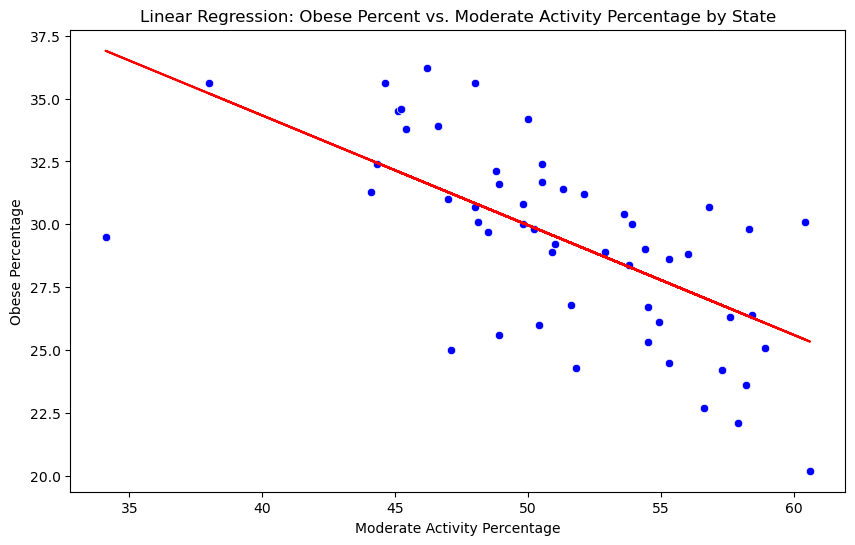

In [22]:
# Plotting
plt.figure(figsize=(10, 6))
sns.scatterplot(x=grouped_df['Moderate activity percentage'], y=grouped_df['Obese percent'], color='blue')
plt.plot(grouped_df['Moderate activity percentage'], regressor.predict(grouped_df[['Moderate activity percentage']]), color='red')
plt.xlabel('Moderate Activity Percentage')
plt.ylabel('Obese Percentage')
plt.title('Linear Regression: Obese Percent vs. Moderate Activity Percentage by State')
plt.show()

We see a negative correlation here with an R-sqaured Score of 0.387. While this indicates some relationship, there is certainly more that would explain obesity percentages in the state. Our Coefficient of -0.44 tells us there is a .44% decrease in obesity within a state given a 1 percent increase in those that participate in moderate activity levels, or, more specifically, those 'who achieve at least 150 minutes a week of moderate-intensity aerobic physical activity or 75 minutes a week of vigorous-intensity aerobic activity (or an equivalent combination)'. Overall, an increase in moderate physical activity is associated with a decrease in obesity percentage. Base evaluation of obesity in Race/Ethnicity and Education levels show that they may cause a significant moderation of results. Further statistical modeling should be done to explore.